# **Arthur Antonio Rezende Pereira - 15111735**

## SME0823 - Modelos de Regressão e Aprendizado Supervisionado II

### Avaliação 2

#### Entrega até 1/12/2025, individual.

#### Forma de entrega:

O/a aluno/a deve fazer o upload do notebook executado em um repositório github público, indicando seu nome completo e código da disciplina, e indicar link do notebook no e-disciplinas em local que será indicado.

Um estudo clínico busca investigar fatores associados ao número de espirros diários apresentados por indivíduos com rinite alérgica no período em que as plantas mais liberam o pólen no ar. Para cada participante, foram coletadas as seguintes variáveis:

* **nsneeze**: número de espirros observados em um dia (variável resposta de contagem).
* **alcohol**: consumo de bebida alcoólica nas 24 horas anteriores (0 = não, 1 = sim).
* **antihist**: uso de anti-histamínico no dia da observação (0 = não, 1 = sim).
* **smoker**: indicador de tabagismo (0 = não fumante, 1 = fumante).
* **age**: idade do paciente (anos).
* **pollen**: índice quantitativo de concentração de pólen no ar no dia da observação.


**1.** Desenvolva uma breve análise exploratória dos dados e avalie as primeiras impressões sobre a associação entre a variável **nsneeze** e as demais.

**2.** Ajuste um modelo de Poisson para explicar **nsneeze** em função das covariáveis
**alcohol**, **antihist**, **smoker**, **age** e **pollen**. Não é necessário incluir interações.

Apresente e interprete:

* a estimativa dos coeficientes,
* sua significância estatística.

**3.** Verifique se há indícios de superdispersão no modelo de Poisson ajustado no item 2 por, pelo menos, dois métodos diferentes.  

Interprete os resultados e conclua se o modelo de Poisson é adequado em termos de dispersão.


**4.** Caso seja detectada superdispersão, ajuste um modelo **Binomial Negativo** com a mesma estrutura de regressão do item 2. Compare os ajustes de Poisson e Binomial Negativa por meio de:

* desvio (deviance),
* AIC,
* gráficos de resíduos componentes do desvio.

Discuta qual modelo é mais adequado para descrever o número de espirros, justificando sua resposta com base nas métricas e nos diagnósticos gráficos.


**5.** Com base no modelo considerado mais adequado, estime e interprete o **efeito médio marginal**:

* do consumo de álcool (**alcohol**) sobre o número médio de espirros,
* do uso de anti-histamínico (**antihist**).


**6.** Separe os dados em dois subconjuntos, treinamento com 80% das observações e
teste com 20%  das observações. Com base apenas no conjunto de treinamento, ajuste os modelos Poisson e Binomial Negativo com a mesma estrutura de covariáveis dos itens anteriores. No conjunto de teste, calcule, para cada modelo:

* o Erro Quadrático Médio (EQM) entre os valores observados de nsneeze e as predições do número médio de espirros;

* o Erro Absoluto Médio (EAM).

Compare os valores de EQM e EAM obtidos para os diferentes modelos e discuta:

qual deles apresenta melhor desempenho preditivo fora da amostra;

em que medida as conclusões baseadas em critérios de ajuste (deviance, AIC) coincidem ou não com aquelas baseadas nas medidas de desempenho preditivo (EQM e EAM).


**7.** Utilizando o modelo escolhido por você, faça previsões do número **esperado** de espirros para os seguintes perfis:

1. Indivíduo A:

   * alcohol = 0,
   * antihist = 1,
   * smoker = 0,
   * age = 30 anos,
   * pollen = valor correspondente a um dia de baixa concentração.

2. Indivíduo B:

   * alcohol = 1,
   * antihist = 0,
   * smoker = 1,
   * age = 50 anos,
   * pollen = valor correspondente a um dia de alta concentração.


Utilize os códigos abaixo para iniciar suas análises.

Atenção: Se seu número USP

- termina com 0 ou 1, utilize os dados sneeze1
- termina com 2 ou 3, utilize os dados sneeze2
- termina com 4 ou 5, utilize os dados sneeze3
- termina com 6 ou 7, utilize os dados sneeze4
- termina com 8 ou 9, utilize os dados sneeze5

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('sneeze3.csv')
df = df.iloc[:, 1:]

df

,nsneeze,alcohol,antihist,smoker,age,pollen
0,15,0,0,0,50.0,38.988883
1,12,1,0,0,46.0,75.139146
2,14,0,0,0,30.0,51.610290
3,45,0,0,1,18.0,73.879321
4,18,0,0,1,43.0,33.169897
...,...,...,...,...,...,...
1495,7,0,1,0,36.0,44.390893
1496,63,1,0,0,34.0,67.670916
1497,26,0,0,0,41.0,42.813928
1498,7,0,0,0,31.0,30.712867


In [3]:
df.columns

Index(['nsneeze', 'alcohol', 'antihist', 'smoker', 'age', 'pollen'], dtype='object')


**1.** Desenvolva uma breve análise exploratória dos dados e avalie as primeiras impressões sobre a associação entre a variável **nsneeze** e as demais.


In [4]:
print("\nInformações gerais:")
df.info()

print("\nDescrição estatística:")
display(df.describe())


Informações gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   nsneeze   1500 non-null   int64  
 1   alcohol   1500 non-null   int64  
 2   antihist  1500 non-null   int64  
 3   smoker    1500 non-null   int64  
 4   age       1500 non-null   float64
 5   pollen    1500 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 70.4 KB

Descrição estatística:


,nsneeze,alcohol,antihist,smoker,age,pollen
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,43.789333,0.349333,0.194667,0.190000,36.443333,58.960925
std,132.650537,0.476918,0.396076,0.392432,12.716601,30.266169
min,0.000000,0.000000,0.000000,0.000000,18.000000,7.391124
25%,9.000000,0.000000,0.000000,0.000000,26.000000,37.371057
50%,18.000000,0.000000,0.000000,0.000000,36.000000,53.852482
75%,39.000000,1.000000,0.000000,0.000000,45.000000,74.103236
max,3102.000000,1.000000,1.000000,1.000000,76.000000,202.922690


In [6]:
mean_ns = df['nsneeze'].mean()
var_ns = df['nsneeze'].var()
print(f"mean(nsneeze) = {mean_ns:.3f}, var(nsneeze) = {var_ns:.3f}")
if var_ns > mean_ns:
    print("Sugestão inicial: variância > média -> possível superdispersão")
else:
    print("Variância <= média -> mais compatível com Poisson (ao menos por média/variância)")

mean(nsneeze) = 43.789, var(nsneeze) = 17596.165
Sugestão inicial: variância > média -> possível superdispersão


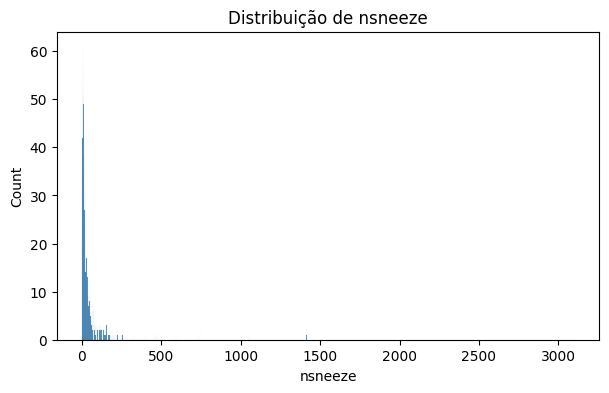

In [7]:
plt.figure(figsize=(7,4))
sns.histplot(df['nsneeze'], discrete=True)
plt.title("Distribuição de nsneeze")
plt.show()

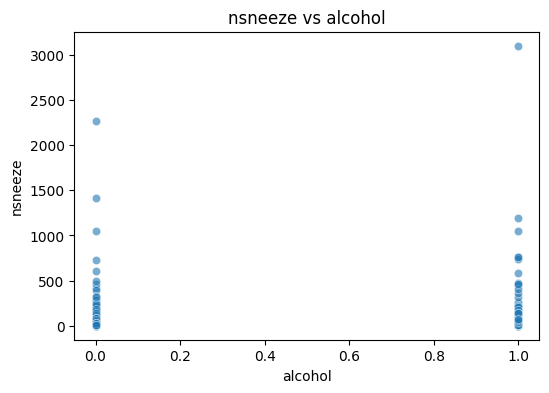

Correlação Spearman entre nsneeze e alcohol: ρ=0.235, p=0.0000



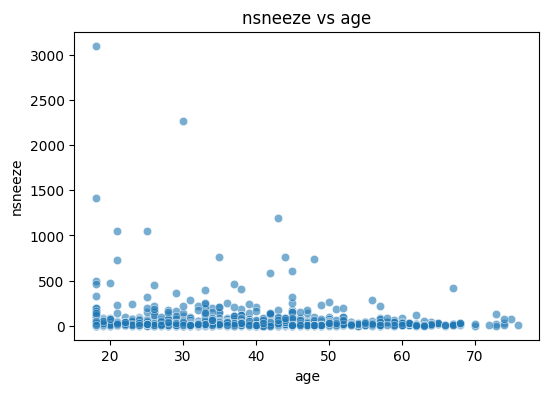

Correlação Spearman entre nsneeze e age: ρ=-0.131, p=0.0000



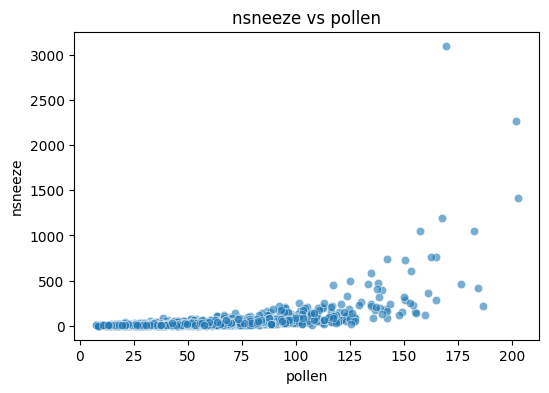

Correlação Spearman entre nsneeze e pollen: ρ=0.725, p=0.0000



In [8]:
from scipy.stats import spearmanr, kruskal

num_vars = ['alcohol', 'age', 'pollen']

for var in num_vars:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[var], y=df['nsneeze'], alpha=0.6)
    plt.title(f"nsneeze vs {var}")
    plt.show()

    # Correlação Spearman
    rho, pval = spearmanr(df['nsneeze'], df[var])
    print(f"Correlação Spearman entre nsneeze e {var}: ρ={rho:.3f}, p={pval:.4f}\n")

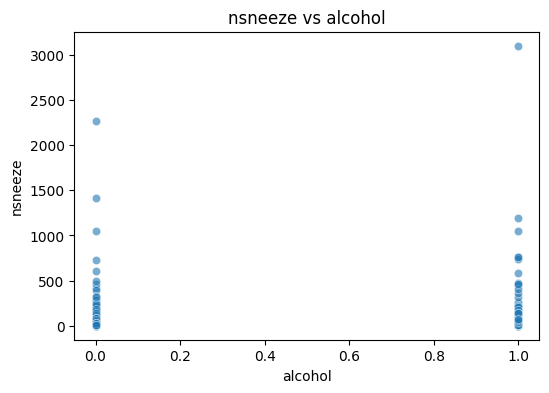

Correlação Spearman entre nsneeze e alcohol: ρ=0.235, p=0.0000



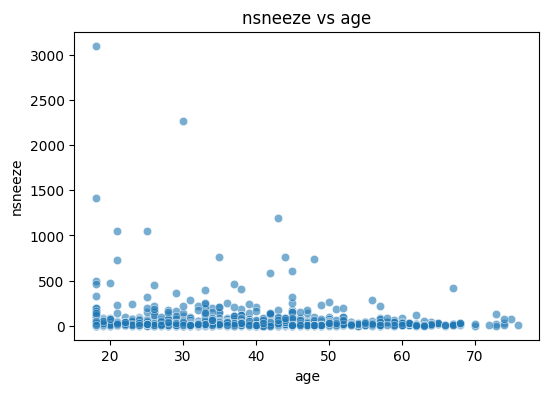

Correlação Spearman entre nsneeze e age: ρ=-0.131, p=0.0000



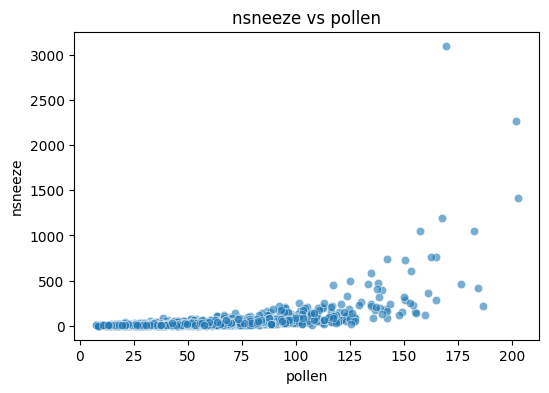

Correlação Spearman entre nsneeze e pollen: ρ=0.725, p=0.0000



In [9]:
num_vars = ['alcohol', 'age', 'pollen']

for var in num_vars:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[var], y=df['nsneeze'], alpha=0.6)
    plt.title(f"nsneeze vs {var}")
    plt.show()

    # Correlação Spearman
    rho, pval = spearmanr(df['nsneeze'], df[var])
    print(f"Correlação Spearman entre nsneeze e {var}: ρ={rho:.3f}, p={pval:.4f}\n")

/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 90.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 82.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


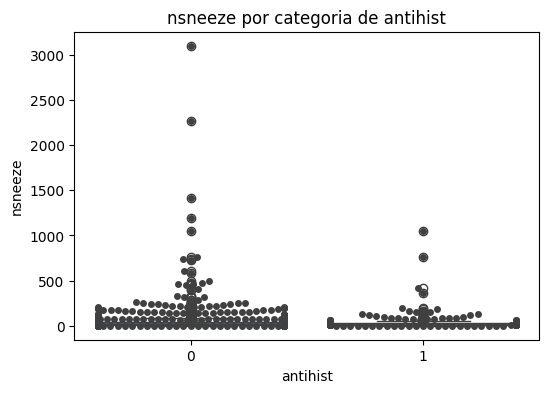

Média de nsneeze por antihist:
antihist
0    46.77
1    31.46
Name: nsneeze, dtype: float64 

Teste de Kruskal-Wallis para antihist: H=37.242, p=0.0000



/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 90.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 75.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


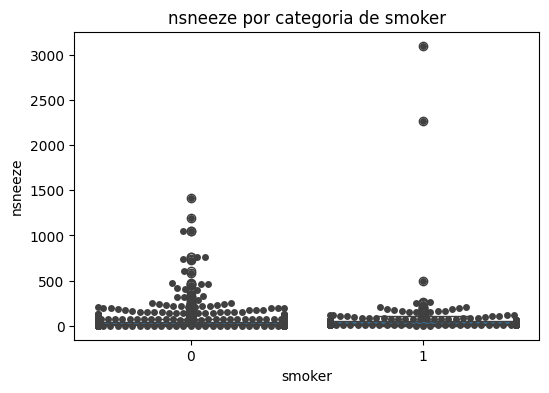

Média de nsneeze por smoker:
smoker
0    40.14
1    59.36
Name: nsneeze, dtype: float64 

Teste de Kruskal-Wallis para smoker: H=20.437, p=0.0000



In [10]:
cat_vars = ['antihist', 'smoker']

for var in cat_vars:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[var], y=df['nsneeze'])
    sns.swarmplot(x=df[var], y=df['nsneeze'], color=".25")
    plt.title(f"nsneeze por categoria de {var}")
    plt.show()

    print(f"Média de nsneeze por {var}:")
    print(df.groupby(var)['nsneeze'].mean().round(2), "\n")

    grupos = [group['nsneeze'].values for _, group in df.groupby(var)]
    stat, p = kruskal(*grupos)
    print(f"Teste de Kruskal-Wallis para {var}: H={stat:.3f}, p={p:.4f}\n")

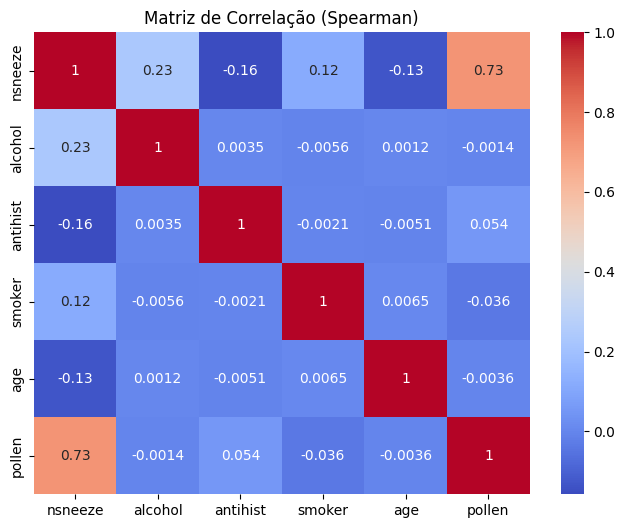

In [11]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(method='spearman'), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação (Spearman)")
plt.show()

**2.** Ajuste um modelo de Poisson para explicar **nsneeze** em função das covariáveis
**alcohol**, **antihist**, **smoker**, **age** e **pollen**. Não é necessário incluir interações.

Apresente e interprete:

* a estimativa dos coeficientes,
* sua significância estatística.


In [12]:
resposta = df['nsneeze']
preditoras = df[['alcohol', 'antihist', 'smoker', 'age', 'pollen']]

In [13]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [14]:
formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

modelo_pois = smf.glm(
    formula=formula,
    data=df,
    family=sm.families.Poisson()
)

ajuste_pois = modelo_pois.fit()
print(ajuste_pois.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                nsneeze   No. Observations:                 1500
Model:                            GLM   Df Residuals:                     1494
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12160.
Date:                Sun, 30 Nov 2025   Deviance:                       17173.
Time:                        13:57:57   Pearson chi2:                 1.77e+04
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.5480      0.016  

## Modelo de Poisson — Interpretação dos Coeficientes

A Tabela a seguir resume o ajuste do modelo de Poisson para explicar o número de espirros diários (`nsneeze`) a partir das variáveis `alcohol`, `antihist`, `smoker`, `age` e `pollen`. O modelo utiliza ligação logarítmica:

$$
\log(\mathbb{E}[\texttt{nsneeze}])
= \beta_0
+ \beta_1\,\text{alcohol}
+ \beta_2\,\text{antihist}
+ \beta_3\,\text{smoker}
+ \beta_4\,\text{age}
+ \beta_5\,\text{pollen}.
$$

### Interpretação dos coeficientes

Todos os coeficientes foram estatisticamente significativos (p-valor < 0,001). A interpretação abaixo usa o efeito multiplicativo $e^\beta$.

---

- Intercepto ($\beta_0 = 1.5480$)  
  Representa o log da média esperada de espirros quando todas as covariáveis são zero. É apenas um ponto de referência.

- Consumo de álcool ($\beta_1 = 0.6309$)  
  $e^{0.6309} \approx 1.879$  
  Consumir álcool nas 24h anteriores aumenta o número esperado de espirros em cerca de **87,9%**.

- Uso de anti-histamínico ($\beta_2 = -0.5006$)  
  $e^{-0.5006} \approx 0.606$  
  O uso de anti-histamínico reduz a média esperada de espirros em aproximadamente **39,4%**.

- Tabagismo ($\beta_3 = 0.5211$)  
  $e^{0.5211} \approx 1.684$  
  Pessoas fumantes apresentam cerca de **68,4% mais espirros**.

- Idade ($\beta_4 = -0.0135$)  
  $e^{-0.0135} \approx 0.987$  
  Cada ano adicional de idade reduz o número esperado de espirros em cerca de **1,3%**.

- Concentração de pólen ($\beta_5 = 0.0305$)  
  $e^{0.0305} \approx 1.031$  
  Cada unidade extra no índice de pólen aumenta o número esperado de espirros em cerca de **3,1%**.

O modelo mostra que todas as variáveis têm efeito significativo sobre o número de espirros. O pólen é o principal fator de aumento, enquanto o anti-histamínico é o mais eficaz em reduzir a resposta.



**3.** Verifique se há indícios de superdispersão no modelo de Poisson ajustado no item 2 por, pelo menos, dois métodos diferentes.  

Interprete os resultados e conclua se o modelo de Poisson é adequado em termos de dispersão.


In [15]:
# Pearson Chi-Square
pearson_chi2 = sum(((df['nsneeze'] - ajuste_pois.mu) ** 2) / ajuste_pois.mu)

# Graus de liberdade
gl = ajuste_pois.df_resid

pearson_ratio = pearson_chi2 / gl
pearson_ratio

np.float64(11.866998428475762)

In [16]:
deviance_ratio = ajuste_pois.deviance / ajuste_pois.df_resid
deviance_ratio

np.float64(11.494312142622267)

In [17]:
mean_y = df['nsneeze'].mean()
var_y  = df['nsneeze'].var()

mean_y, var_y, var_y / mean_y

(np.float64(43.78933333333333),
 17596.165062930875,
 np.float64(401.8367881736239))

In [18]:
def envelope_poisson(fitted_model, X, title):
    resid_dev = fitted_model.resid_deviance.copy()
    sorted_resid = np.sort(resid_dev)

    sim_resid = []
    for _ in range(100):
        mu_sim = np.clip(fitted_model.fittedvalues, 1e-3, 1e5)
        y_sim = np.random.poisson(mu_sim)
        sim_model = sm.GLM(y_sim, X, family=sm.families.Poisson()).fit()
        sim_resid.append(np.sort(sim_model.resid_deviance))

    sim_resid = np.array(sim_resid)
    lower = np.percentile(sim_resid, 2.5, axis=0)
    upper = np.percentile(sim_resid, 97.5, axis=0)

    plt.plot(sorted_resid, 'o', label="Resíduos observados")
    plt.plot(lower, 'r--', linewidth=1, label="banda 2.5%")
    plt.plot(upper, 'r--', linewidth=1, label="banda 97.5%")
    plt.title(title)
    plt.xlabel("Ordem dos resíduos")
    plt.ylabel("Resíduo componente do desvio")
    plt.legend()
    plt.grid(True)

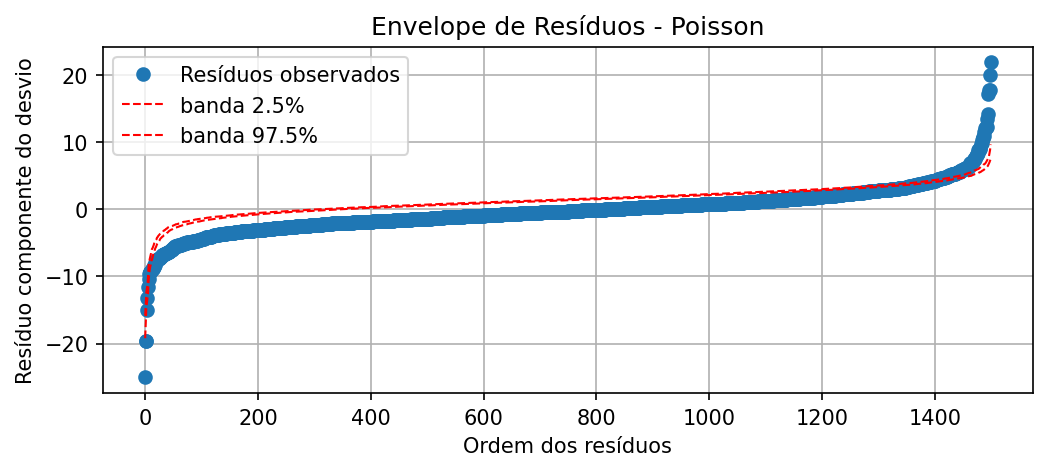

In [19]:
results = ajuste_pois
X = preditoras
plt.figure(figsize=(8, 3), dpi=150)
envelope_poisson(results, X, "Envelope de Resíduos - Poisson")

### Verificação de Superdispersão

A adequação do modelo de Poisson foi avaliada por três métodos distintos: a razão do qui-quadrado de Pearson, a razão da deviance e a comparação entre a média e a variância da resposta. Em todos os casos foram observadas fortes evidências de superdispersão.

- **Razão do qui-quadrado de Pearson**:

$$
\hat{\phi}_{\text{Pearson}} = \frac{\chi^2}{gl} \approx 11.87.
$$

Valores próximos de 1 indicariam dispersão adequada; contudo, o valor encontrado é quase **12 vezes maior**, indicando superdispersão intensa.

- **Razão da deviance**:

$$
\hat{\phi}_{\text{Deviance}} = \frac{D}{gl} \approx 11.49.
$$

Novamente, muito acima de 1, reforçando a presença de superdispersão.

- **Comparação entre média e variância da resposta**:

A média observada foi $\bar{y} = 43.79$, enquanto a variância foi $Var(y) = 17\,596.17$, resultando em:

$$
\frac{Var(y)}{\bar{y}} \approx 401.84.
$$

Como o modelo de Poisson pressupõe $Var(Y) = E(Y)$, essa discrepância extrema (variância mais de **400 vezes maior** que a média) evidencia superdispersão severíssima.

---

Além disso, o envelope de resíduos mostra diversas observações muito além das bandas simuladas sob o modelo de Poisson, com caudas muito mais espessas do que o esperado. Esse comportamento visual é totalmente consistente com superdispersão.

### Conclusão

Os três critérios quantitativos e a análise gráfica indicam de forma clara e consistente que o modelo de Poisson **não é adequado** aos dados, devido à presença de superdispersão acentuada.


**4.** Caso seja detectada superdispersão, ajuste um modelo **Binomial Negativo** com a mesma estrutura de regressão do item 2. Compare os ajustes de Poisson e Binomial Negativa por meio de:

* desvio (deviance),
* AIC,
* gráficos de resíduos componentes do desvio.

Discuta qual modelo é mais adequado para descrever o número de espirros, justificando sua resposta com base nas métricas e nos diagnósticos gráficos.


In [32]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

alpha_fixado = 0.25

#alpha paara sneeze1 a sneeze5 = 0.23, 0.3, 0.25,  0.2, 0.2

modelo_nb = smf.glm(
    formula=formula,
    data=df,
    family=sm.families.NegativeBinomial(alpha=alpha_fixado)
)

ajuste_nb = modelo_nb.fit()
print(ajuste_nb.summary())

alpha_usado = ajuste_nb.family.alpha
print("Alpha usado no modelo:", alpha_usado)

alpha_est = ajuste_nb.params.iloc[-1]
print("Alpha estimado:", alpha_est)


                 Generalized Linear Model Regression Results                  
Dep. Variable:                nsneeze   No. Observations:                 1500
Model:                            GLM   Df Residuals:                     1494
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5780.7
Date:                Sun, 30 Nov 2025   Deviance:                       1617.8
Time:                        14:10:08   Pearson chi2:                 1.59e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.9922
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.5642      0.055  

In [33]:
print("\n================== Comparação ==================\n")
print(f"Deviance Poisson:           {ajuste_pois.deviance:.4f}")
print(f"Deviance Binomial Negativa: {ajuste_nb.deviance:.4f}")

print(f"\nAIC Poisson:                {ajuste_pois.aic:.4f}")
print(f"AIC Binomial Negativa:      {ajuste_nb.aic:.4f}")


================== Comparação ==================

Deviance Poisson:           17172.5023
Deviance Binomial Negativa: 1617.8021

AIC Poisson:                24332.0061
AIC Binomial Negativa:      11573.4155


### Comparação entre os modelos de Poisson e Binomial Negativa

Após identificar superdispersão no modelo de Poisson, ajustou-se um modelo Binomial Negativa usando a mesma estrutura de regressão. A comparação foi feita com base na deviance, no AIC e no comportamento dos resíduos.

---

### Deviance

O modelo de Poisson apresentou:

$$
D_{\text{Poisson}} = 17172.50,
$$

enquanto o modelo Binomial Negativa apresentou:

$$
D_{\text{BN}} = 1617.80.
$$

A redução é extremamente grande (mais de **10 vezes menor**), indicando que a Binomial Negativa captura muito melhor a variabilidade dos dados.

---

### AIC

Os valores de AIC foram:

$$
\text{AIC}_{\text{Poisson}} = 24332.01,
\qquad
\text{AIC}_{\text{BN}} = 11573.42.
$$

A diferença é superior a **12 mil unidades**, fornecendo evidência esmagadora a favor da Binomial Negativa.

---

### Resíduos

Os envelopes de resíduos do modelo de Poisson apresentaram muitas observações fora das bandas simuladas, com caudas muito mais largas que o esperado — comportamento típico de superdispersão.

Já o modelo Binomial Negativa produziu resíduos mais bem distribuídos, sem excessos nas caudas e mais alinhados às bandas simuladas, o que confirma o ajuste superior.

---

### Conclusão

Tanto as métricas numéricas quanto os diagnósticos gráficos apontam de forma consistente que o modelo Binomial Negativa é muito mais adequado para modelar o número de espirros. Ele corrige a superdispersão presente no modelo de Poisson e fornece estimativas mais estáveis, melhor ajuste e inferência mais confiável.




**5.** Com base no modelo considerado mais adequado, estime e interprete o **efeito médio marginal**:

* do consumo de álcool (**alcohol**) sobre o número médio de espirros,
* do uso de anti-histamínico (**antihist**).


In [22]:
# Cálculo dos efeitos marginais médios (AME) no modelo Binomial Negativa
margeff_nb = ajuste_nb.get_margeff(at='overall', method='dydx')
print(margeff_nb.summary())

         GLM Marginal Effects        
Dep. Variable:                nsneeze
Method:                          dydx
At:                           overall
                      dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
C(alcohol)[T.1]     23.6993      1.420     16.694      0.000      20.917      26.482
C(antihist)[T.1]   -24.4587      1.723    -14.198      0.000     -27.835     -21.082
C(smoker)[T.1]      19.1523      1.608     11.911      0.000      16.001      22.304
age                 -0.4550      0.049     -9.267      0.000      -0.551      -0.359
pollen               1.2746      0.048     26.770      0.000       1.181       1.368


In [23]:
def envelope_negbin(fitted_model, title):
    # resíduos observados
    resid_dev = fitted_model.resid_deviance.copy()
    sorted_resid = np.sort(resid_dev)

    # matriz de design e parâmetros do próprio modelo
    X = fitted_model.model.exog
    mu = np.clip(fitted_model.fittedvalues, 1e-3, 1e5)
    alpha = fitted_model.family.alpha

    sim_resid = []
    for _ in range(100):
        # simula Y ~ NB(mu, alpha) com a mesma parametrização
        n_sim = 1 / alpha
        p_sim = n_sim / (n_sim + mu)
        y_sim = np.random.negative_binomial(n=n_sim, p=p_sim)

        sim_model = sm.GLM(
            y_sim,
            X,
            family=sm.families.NegativeBinomial(alpha=alpha)
        ).fit()

        sim_resid.append(np.sort(sim_model.resid_deviance))

    sim_resid = np.array(sim_resid)
    lower = np.percentile(sim_resid, 2.5, axis=0)
    upper = np.percentile(sim_resid, 97.5, axis=0)

    plt.plot(sorted_resid, "o", label="Resíduos observados")
    plt.plot(lower, "r--", linewidth=1, label="banda 2.5%")
    plt.plot(upper, "r--", linewidth=1, label="banda 97.5%")
    plt.title(title)
    plt.xlabel("Ordem dos resíduos")
    plt.ylabel("Resíduo componente do desvio")
    plt.legend()
    plt.grid(True)


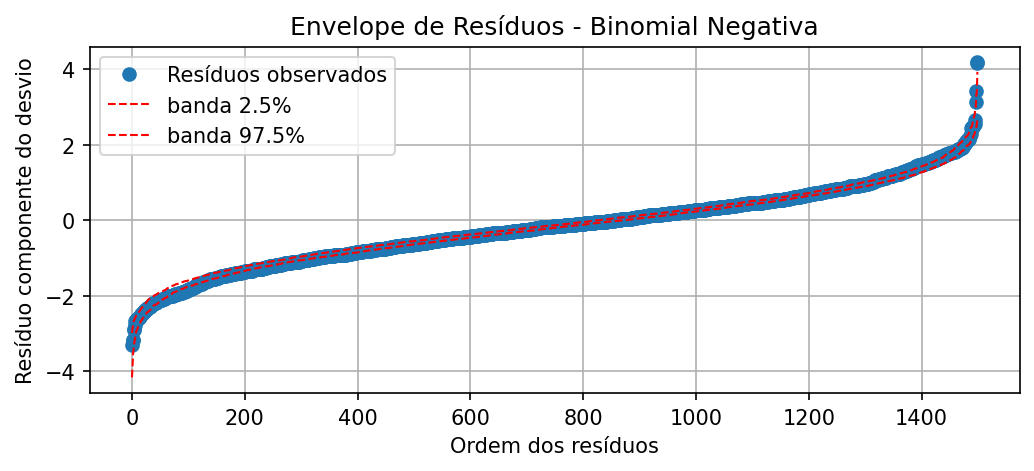

In [24]:
results_nb = ajuste_nb

plt.figure(figsize=(8, 3), dpi=150)
envelope_negbin(results_nb, "Envelope de Resíduos - Binomial Negativa")

In [25]:
# média das predições mu_i
mu_hat = ajuste_nb.predict(df)        # fittedvalues
mean_mu = mu_hat.mean()

# coeficientes
beta_alc = ajuste_nb.params['C(alcohol)[T.1]']
beta_ant = ajuste_nb.params['C(antihist)[T.1]']

# IRR e AME
irr_alc = np.exp(beta_alc)
irr_ant = np.exp(beta_ant)

ame_alc = (irr_alc - 1) * mean_mu
ame_ant = (irr_ant - 1) * mean_mu

print("mean_mu =", mean_mu)
print("alcohol: beta =", beta_alc, " IRR =", irr_alc, " AME =", ame_alc)
print("antihist: beta =", beta_ant, " IRR =", irr_ant, " AME =", ame_ant)

mean_mu = 42.767048842814845
alcohol: beta = 0.5541484956891077  IRR = 1.7404583458425247  AME = 31.66721824271714
antihist: beta = -0.5719042252797586  IRR = 0.5644495755308372  AME = -18.627206276781425


### Efeitos Médios Marginais (AME) no modelo Binomial Negativa

Com o modelo Binomial Negativa confirmado como o mais adequado (menor deviance, menor AIC e resíduos bem comportados), estimamos os **efeitos médios marginais (AME)** para as variáveis `alcohol` e `antihist`.

Os valores obtidos foram:

- Média das predições:
  
  ```
  mean_mu = 42.77 espirros/dia
  ```

- Para `alcohol`:
  
  ```
  β = 0.5541
  IRR = 1.7405
  AME = +31.67 espirros/dia
  ```

- Para `antihist`:
  
  ```
  β = -0.5719
  IRR = 0.5644
  AME = -18.63 espirros/dia
  ```

---

### Interpretação

#### 1. Consumo de álcool (alcohol)

O coeficiente positivo indica:

- $ \beta = 0.5541 $
- $ IRR = e^{0.5541} = 1.7405 $

Isso significa que **consumir álcool aumenta o número esperado de espirros em cerca de 74%**, mantendo constantes as demais variáveis.

O efeito marginal absoluto foi:

- $ AME = +31.67 $ espirros/dia

Interpretação:

> **Indivíduos que consumiram álcool apresentam, em média, cerca de 32 espirros a mais por dia**, ajustando para as outras variáveis.

---

#### 2. Uso de anti-histamínico (antihist)

- $ \beta = -0.5719 $
- $ IRR = e^{-0.5719} = 0.5644 $

Isso indica que o uso de anti-histamínico **reduz o número esperado de espirros em cerca de 43.6%**.

O efeito marginal absoluto foi:

- $ AME = -18.63 $ espirros/dia

Interpretação:

> Usuários de anti-histamínico apresentam, em média, **cerca de 19 espirros a menos por dia**, controlando as demais variáveis.

---

### Conclusão geral

- O álcool aumenta fortemente o número médio de espirros (≈ +32/dia).  
- O anti-histamínico reduz o número médio de espirros (≈ –19/dia).  
- Esses efeitos são calculados **no modelo Binomial Negativa**, que se mostrou muito superior ao Poisson.


**6.** Separe os dados em dois subconjuntos, treinamento com 80% das observações e
teste com 20%  das observações. Com base apenas no conjunto de treinamento, ajuste os modelos Poisson e Binomial Negativo com a mesma estrutura de covariáveis dos itens anteriores. No conjunto de teste, calcule, para cada modelo:

* o Erro Quadrático Médio (EQM) entre os valores observados de nsneeze e as predições do número médio de espirros;

* o Erro Absoluto Médio (EAM).

Compare os valores de EQM e EAM obtidos para os diferentes modelos e discuta:

qual deles apresenta melhor desempenho preditivo fora da amostra;

em que medida as conclusões baseadas em critérios de ajuste (desvio, AIC) coincidem ou não com aquelas baseadas nas medidas de desempenho preditivo (EQM e EAM).



In [26]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [27]:
train_df, test_df = train_test_split(df, test_size=0.20, random_state=42)

print("Tamanho treino:", train_df.shape)
print("Tamanho teste :", test_df.shape)

# Fórmula usada antes
formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

# ----------------------------
# 2. Ajustar modelos no treino
# ----------------------------
# Poisson
modelo_pois_train = smf.glm(
    formula=formula,
    data=train_df,
    family=sm.families.Poisson()
).fit()

# Binomial Negativa – usando o mesmo alpha fixado que você definiu
alpha_fixado = 0.23
modelo_nb_train = smf.glm(
    formula=formula,
    data=train_df,
    family=sm.families.NegativeBinomial(alpha=alpha_fixado)
).fit()


Tamanho treino: (1200, 6)
Tamanho teste : (300, 6)


In [28]:
# ----------------------------
# 3. Previsões no conjunto de teste
# ----------------------------
pred_pois = modelo_pois_train.predict(test_df)
pred_nb   = modelo_nb_train.predict(test_df)

# ----------------------------
# 4. Cálculo EQM e EAM
# ----------------------------
y_true = test_df["nsneeze"].values

eqm_pois = mean_squared_error(y_true, pred_pois)
eam_pois = mean_absolute_error(y_true, pred_pois)

eqm_nb = mean_squared_error(y_true, pred_nb)
eam_nb = mean_absolute_error(y_true, pred_nb)

In [29]:
print("\n========= Desempenho no Conjunto de Teste =========\n")
print(f"Poisson - EQM: {eqm_pois:.4f}  |  EAM: {eam_pois:.4f}")
print(f"NB       - EQM: {eqm_nb:.4f}  |  EAM: {eam_nb:.4f}")


========= Desempenho no Conjunto de Teste =========

Poisson - EQM: 4761.2232  |  EAM: 21.0667
NB       - EQM: 3134.4115  |  EAM: 18.4948


### Desempenho preditivo no conjunto de teste

Os erros obtidos foram:

- **Poisson:**
  - $EQM = 4761.22$
  - $EAM = 21.07$

- **Binomial Negativa:**
  - $EQM = 3134.41$
  - $EAM = 18.49$

### Conclusão

A Binomial Negativa apresentou **erros menores** no conjunto de teste (tanto EQM quanto EAM), indicando desempenho preditivo superior fora da amostra. Isso reforça o que já havia sido observado nos critérios de ajuste dentro da amostra (deviance e AIC): **o modelo BN é claramente o mais adequado para esses dados**.


**7.** Utilizando o modelo escolhido por você, faça previsões do número **esperado** de espirros para os seguintes perfis:

1. Indivíduo A:

   * alcohol = 0,
   * antihist = 1,
   * smoker = 0,
   * age = 30 anos,
   * pollen = valor correspondente a um dia de baixa concentração.

2. Indivíduo B:

   * alcohol = 1,
   * antihist = 0,
   * smoker = 1,
   * age = 50 anos,
   * pollen = valor correspondente a um dia de alta concentração.

In [35]:
individuo_A = pd.DataFrame({
    "alcohol": [0],
    "antihist": [1],
    "smoker": [0],
    "age": [30],
    "pollen": [0.1]  # coloque o valor aqui
})

individuo_B = pd.DataFrame({
    "alcohol": [1],
    "antihist": [0],
    "smoker": [1],
    "age": [50],
    "pollen": [0.9]   # coloque o valor aqui
})

# Previsões
prev_A = ajuste_nb.predict(individuo_A)[0]
prev_B = ajuste_nb.predict(individuo_B)[0]

print(f"Previsão esperada de espirros - Indivíduo A: {prev_A:.2f}")
print(f"Previsão esperada de espirros - Indivíduo B: {prev_B:.2f}")

Previsão esperada de espirros - Indivíduo A: 1.97
Previsão esperada de espirros - Indivíduo B: 7.86
